# Breast Cancer Detection
##     Data Description 
### Wisconsin Diagnostic Breast Cancer Dataset

    The Features are computed from a digitized image of a Fine Needle Aspirate(FNA) of a breast mass. They describe the characterstics of the cell nuclei present in the image. 
    
    Attribute Information:
    1> ID Number
    2> Diagnosis (M= Malignant,B=Benign)
    
    3 - 13> Ten real-valued features computed for each cells nucleus (RTPASmCCCSFD)
            1> radius (mean of distances from center to points on the perimeter) 
            2> texture (standard deviation of gray-scale values)
            3> perimeter
            4> area
            5> smoothness (local variation in radius lengths)
            6> compactness
            7> concativity (severity of concave portions of the contour)
            8> concave points
            9> symmetry
            10> fractal dimension
    
    The mean, standard error and "worst" for each of these features were computed.
    Hence 2 + 10*3 = 32 attributes
    
    Additionally: No Missing Values
    Class Distribution: 357 benign, 212 Malignant

# Intuition

This looks like a classification problem where we have to develop a mechanism to tell whether a the given information of breast mass sample has Malignant or Benign cancer.

So CLASSIFICATION looks like the way to go.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time


In [2]:
data = pd.read_csv("BreastCancerData_UCI.csv")

### First Looking at Data

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


    1> Row ID cannot be used for classification
    2> Diagnosis is the response variable
    3> Unnamed 32: is a variable that has all NaN

    Hence we can drop them and put the remaining in our 'X' set

In [4]:
drop_cols = ['id','diagnosis','Unnamed: 32']
X = data.drop(drop_cols,axis=1)

In [5]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Now we are left with 30 parameters in the X set

In [9]:
len(X.columns)

30

## Now we look at the distribution of the y-label

B    357
M    212
Name: diagnosis, dtype: int64


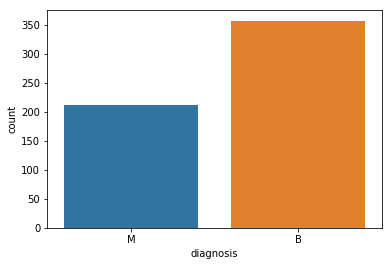

In [10]:
Y = data['diagnosis']
ax = sns.countplot(Y,label="Count")
print(Y.value_counts())

    There are less occurances of Malignant data in the Dataset

In [12]:
X.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


    Looking at the structure of the data, we see that the variance in data is huge which is not suitable for visualization as the scale would be different for the variables. (Area 143 - 2501, smoothness 0.05 - 0.16 etc) 
    Hence, we will need to standardize (Mean = 0) or Normalize the data before visualization, feature selection, feature extraction or classification.
   ## Standardization
        
     Standardization of a dataset is a common requirement for many
     machine learning estimators: they might behave badly if the
     individual feature do not more or less look like standard normally
     distributed data (e.g. Gaussian with 0 mean and unit variance).
     For instance many elements used in the objective function of
     a learning algorithm (such as the RBF kernel of Support Vector
     Machines or the L1 and L2 regularizers of linear models) assume that
     all features are centered around 0 and have variance in the same
     order. If a feature has a variance that is orders of magnitude larger
     that others, it might dominate the objective function and make the
     estimator unable to learn from other features correctly as expected


from sklearn.preprocessing import StandardScaler
ssc = StandardScaler()
X_trans  = ssc.fit(X)

In [21]:
from sklearn.preprocessing import StandardScaler

In [35]:
data_dia = Y
data = X
data_standardized = (data - data.mean())/data.std()

In [36]:
data_standardized.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-3.136331e-15,-6.558316e-15,-7.012551e-16,-8.339355e-16,6.120470e-15,-1.074321e-15,-4.031144e-16,1.006030e-15,-1.888550e-15,4.860396e-16,...,-2.346102e-15,1.761138e-15,-1.214416e-15,5.919889e-16,-5.033661e-15,-2.118204e-15,6.649631e-16,-1.795088e-16,-2.481734e-15,2.424930e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.027864e+00,-2.227289e+00,-1.982759e+00,-1.453164e+00,-3.109349e+00,-1.608721e+00,-1.113893e+00,-1.260710e+00,-2.741705e+00,-1.818265e+00,...,-1.725382e+00,-2.222039e+00,-1.691872e+00,-1.221348e+00,-2.680337e+00,-1.442609e+00,-1.304683e+00,-1.743529e+00,-2.159060e+00,-1.600431e+00
25%,-6.887793e-01,-7.253249e-01,-6.913472e-01,-6.666089e-01,-7.103378e-01,-7.464292e-01,-7.430941e-01,-7.372951e-01,-7.026215e-01,-7.220040e-01,...,-6.743279e-01,-7.479711e-01,-6.889721e-01,-6.415713e-01,-6.906227e-01,-6.804845e-01,-7.558491e-01,-7.557349e-01,-6.412994e-01,-6.913035e-01
50%,-2.148925e-01,-1.045442e-01,-2.357726e-01,-2.949274e-01,-3.486040e-02,-2.217454e-01,-3.419391e-01,-3.973715e-01,-7.156354e-02,-1.781226e-01,...,-2.688030e-01,-4.347738e-02,-2.857288e-01,-3.408813e-01,-4.680159e-02,-2.692639e-01,-2.180402e-01,-2.232725e-01,-1.272975e-01,-2.162538e-01
75%,4.689800e-01,5.836621e-01,4.992377e-01,3.631877e-01,6.356397e-01,4.934227e-01,5.255994e-01,6.463664e-01,5.303125e-01,4.705693e-01,...,5.215568e-01,6.577623e-01,5.398040e-01,3.572747e-01,5.970195e-01,5.391944e-01,5.306742e-01,7.118836e-01,4.497425e-01,4.503661e-01
max,3.967796e+00,4.647799e+00,3.972634e+00,5.245913e+00,4.766717e+00,4.564409e+00,4.239858e+00,3.924477e+00,4.480808e+00,4.906602e+00,...,4.090590e+00,3.882489e+00,4.283568e+00,5.924959e+00,3.951897e+00,5.108382e+00,4.696536e+00,2.683516e+00,6.040726e+00,6.840837e+00


## Visualization
    Here we have standardized the data.  Now we try to visualize the data

## Violio Plots
    Violin plots show the kernel density of the parameter and how they contribute towards the response classes

In [42]:
data = pd.concat([Y,data_standardized.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars = "diagnosis",var_name = "features", value_name= "value")

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

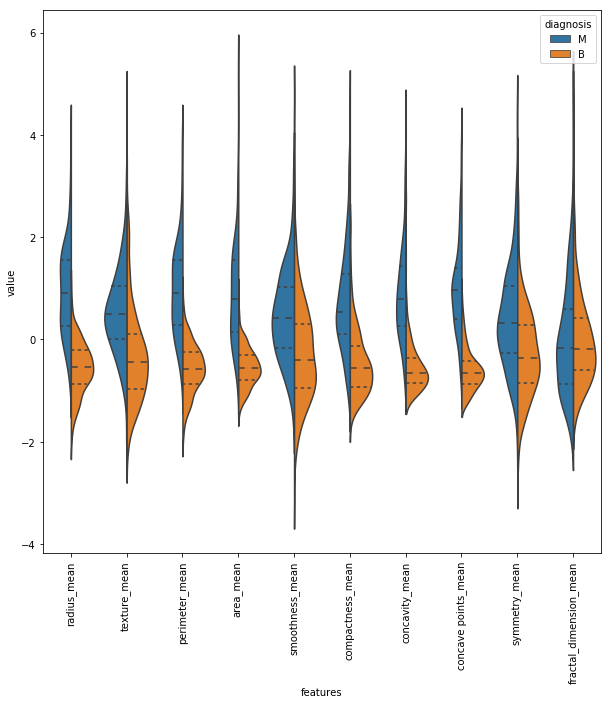

In [43]:
plt.figure(figsize=(10,10))
sns.violinplot(x="features",y="value",hue="diagnosis",data=data,split=True,inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

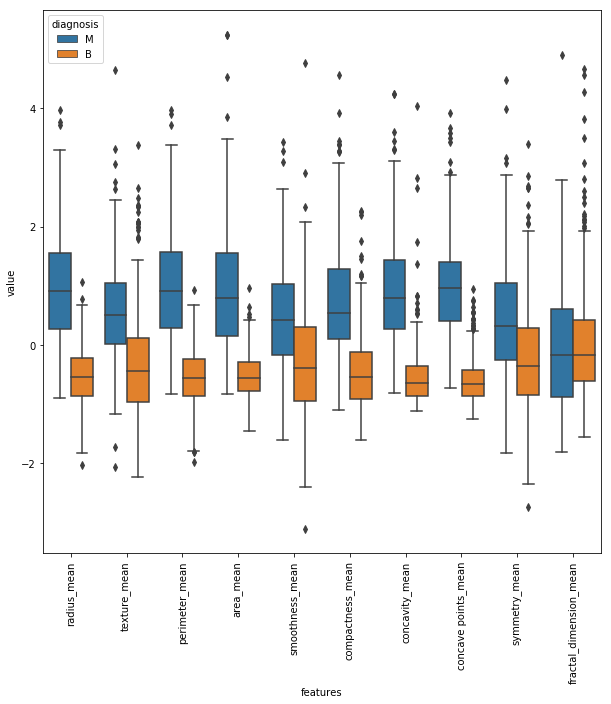

In [46]:
plt.figure(figsize=(10,10))
sns.boxplot(x="features",y="value",hue="diagnosis",data=data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

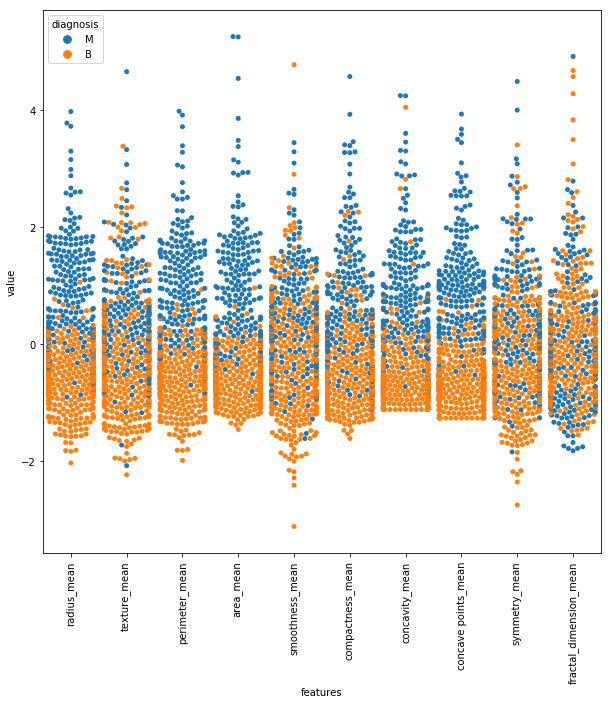

In [48]:
plt.figure(figsize=(10,10))
sns.swarmplot(x="features",y="value",hue="diagnosis",data=data)
plt.xticks(rotation=90)

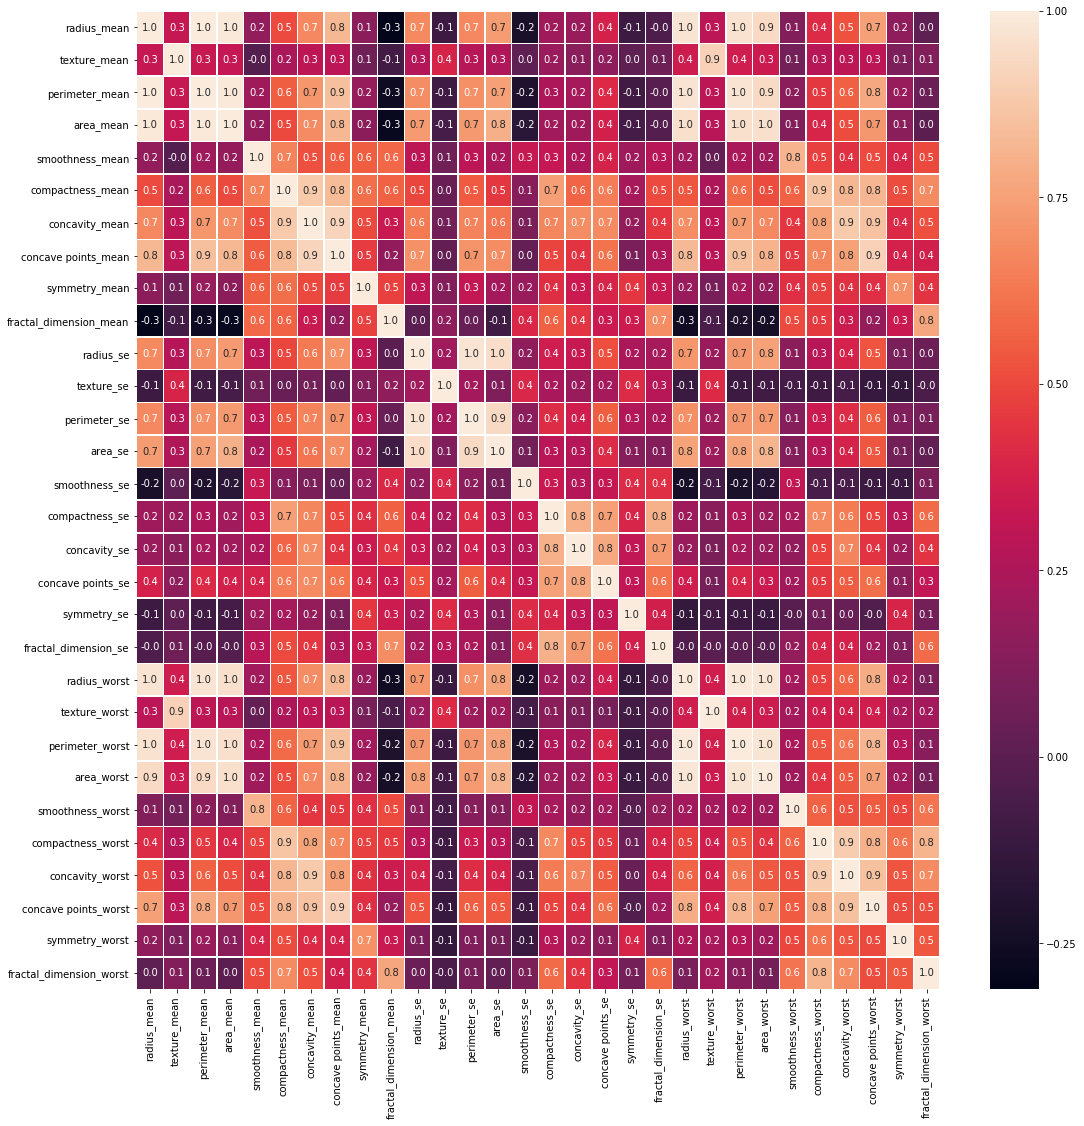

In [50]:
f,ax= plt.subplots(figsize=(18,18))
sns.heatmap(X.corr(),annot=True,linewidths = .5,fmt='.1f',ax=ax)

###  We should repeat this process for other 20 parameters of standard error and "worst" recordings of the main params
    Main Params:
    1> Radius
    2> Perimeter
    3> Area 
    4> Texture 
    5> Smoothness
    6> Compactness
    7> Concativity
    8> Concave Points
    9> Symmetry
    10> Fractal Dimensions
    
### Observations
        1> compactness_mean, concativity_mean, and concave points_mean are correlated with each other. 
        2> radius_se,perimeter_se,area_se/radius_worst,perimeter_worst,area_worst are correlated with each other.
        .
        .
        .
        
### Actions
    We select one from each set of correlated features and drop the remaining parameters from the analysis

In [49]:
drop_list1 =  ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
X_1 = X.drop(drop_list1,axis=1)
X_1.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


### We again see if the selected parameters having any strong correlations amongst them 

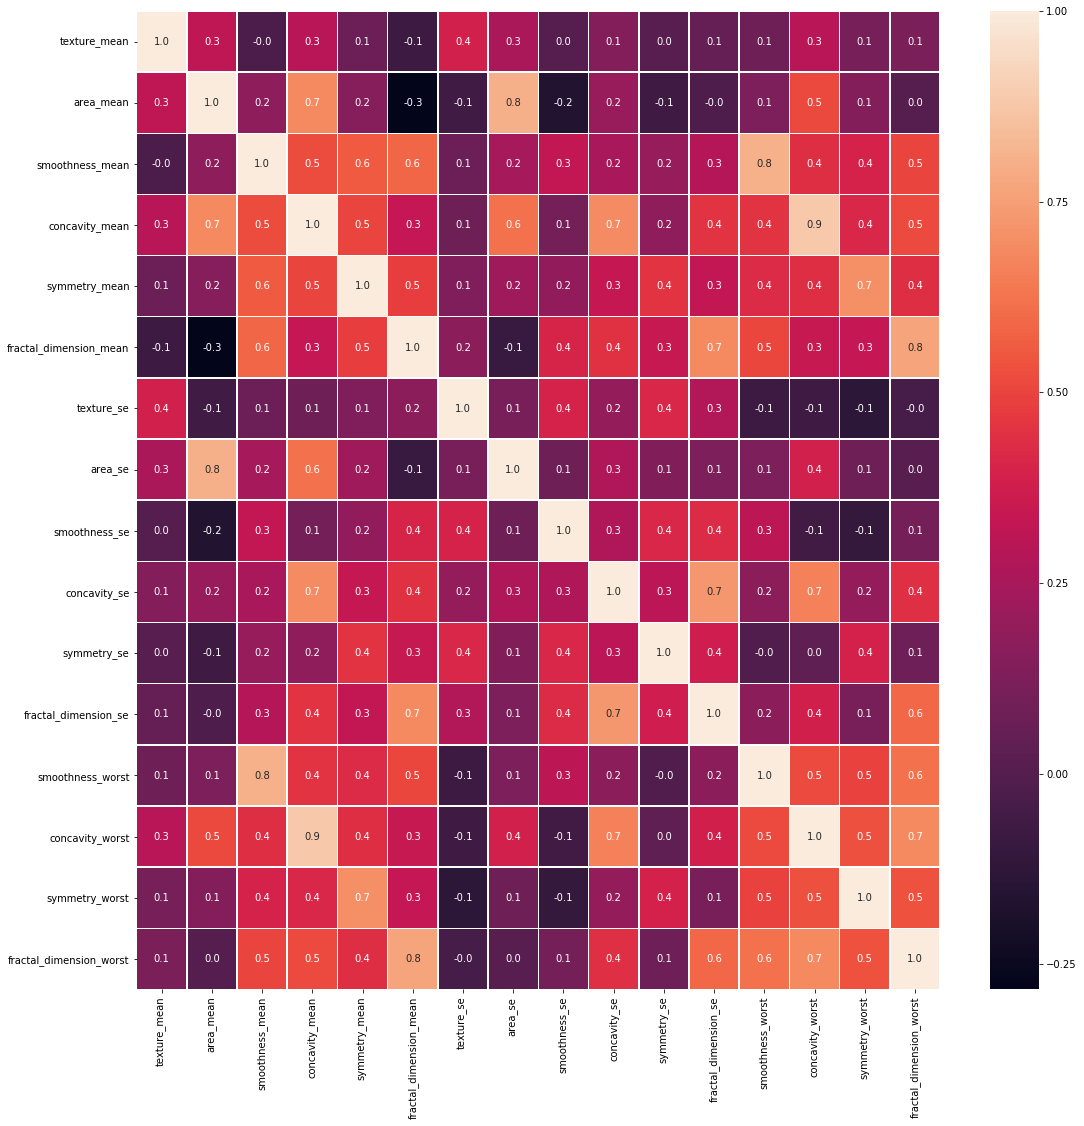

In [52]:
f,ax = plt.subplots(figsize=(18,18))
sns.heatmap(X_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

## Did we choose the best features yet? 
    Lets find out using Random forest to see the strength of the chosen features in the analysis

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

    70 - 30 Split for train - test data

In [175]:
X_train,X_test,Y_train,Y_test = train_test_split(X_1,Y,test_size = 0.3,random_state=42)

In [176]:
# Random Forest Classifier with n_estimators = 10
clf_rf = RandomForestClassifier(random_state=43)
clr_rf = clf_rf.fit(X_train,Y_train)
Y_pred = clr_rf.predict(X_test)

In [177]:
ac = accuracy_score(Y_test,Y_pred)
print("Accuracy is :",ac)

Accuracy is : 0.9532163742690059


In [178]:
cm = confusion_matrix(Y_test,Y_pred)
cm

array([[105,   3],
       [  5,  58]])

In [179]:
importances = [(x,y) for x,y in zip(X_test.columns,clr_rf.feature_importances_)]
sorted_imp = sorted(importances,key=lambda item:item[1],reverse=True)
print("Decresing order of Importance of Parameters")
for i in sorted(importances,key=lambda item:item[1],reverse=True):
    print(i)

Decresing order of Importance of Parameters
('concavity_worst', 0.22603057355610617)
('concavity_mean', 0.1905740190999308)
('area_se', 0.16620779757306034)
('area_mean', 0.1521089587109697)
('concavity_se', 0.058111685885337994)
('fractal_dimension_mean', 0.03148842143750499)
('smoothness_se', 0.02986683112434485)
('smoothness_worst', 0.027056970691976934)
('smoothness_mean', 0.02454035861573683)
('symmetry_worst', 0.019871953326512155)
('symmetry_se', 0.017716277779185625)
('fractal_dimension_worst', 0.016648412537068894)
('texture_mean', 0.01625475587954193)
('symmetry_mean', 0.009470185691125609)
('fractal_dimension_se', 0.007684682860148363)
('texture_se', 0.006368115231448972)


### ROC Curve metrics 
    Area under ROC curve gives us an estimate of True Positive Rate and False Positive Rate.
    Better the area, better the classification model

In [111]:
from sklearn.metrics import auc,roc_auc_score,roc_curve
def toBin(val):
    codes = {"M":1,"B":0}
    return codes[val]
print(type(X_))

## Using K-fold cross validation
    Without K-fold CV, we would just evaluate our model using the test dataset, which would give us the accuracy of our model and we could check the goodness of fit using Area under ROC curve (AUROC) metric.
    However, we don't know how much this accuracy would vary for different samples of unseen data. So we need to generate more tests on different training and testing samples from within that data we have.
    
    
### K-fold cross validation helps us understand the variance in the predictions of our model using the training data.
    
    
    

In [167]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clr_rf,X_train,Y_train,cv=10,n_jobs = -1)

In [180]:
print("Mean: ",scores.mean())

Mean:  0.9394736842105263


#### Calculating the Variance of score generated by K-fold CV (10 fold in our case)

In [174]:
print("Variance: ",scores.std()**2)
print("Variance: ",sum((scores -scores.mean())**2)/len(scores))
print("Variance: ",scores.var())

Variance:  0.0009445983379501375
Variance:  0.0009445983379501373
Variance:  0.0009445983379501374


## We see that we obtained a mean accuracy of 93.94% with  a low variance of 0.09%, which is very good


# Using Grid Search

In [182]:
from sklearn.model_selection import GridSearchCV
params = {
    "n_estimators":[10,100,1000],
    "criterion":["gini","entropy"],
}

gsc = GridSearchCV(clr_rf,param_grid=params)

In [184]:
gsc_result = gsc.fit(X_train,Y_train)

In [187]:
print("Best Score: ",gsc_result.best_score_)
print("Best Index: ",gsc.best_index_)
print("Best Params :",gsc.best_params_)

Best Score:  0.9472361809045227
Best Index:  4
Best Params : {'criterion': 'entropy', 'n_estimators': 100}


### Accuracy of 94.7% acheived by changing Hyperparameters
    Thus, We know that Our Best Configuration of Hyperparameters for RandomForest Classifier can give use Accuracy of 94.7%
    Accuracy of 94.7% can be achieved by using N_estimators = 100, and criterion for splitting as "Entropy" instead of the Default "gini" index